In [18]:
#!pip install darts
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from darts import TimeSeries

In [19]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
air_series = AirPassengersDataset().load() 
milk_series = MonthlyMilkDataset().load()

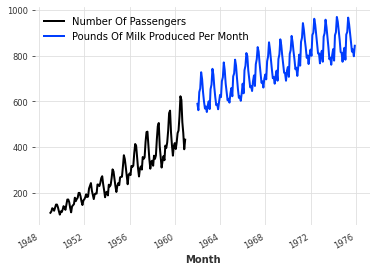

In [20]:
#plot chart
air_series.plot(label="Number Of Passengers")
milk_series.plot(label="Pounds Of Milk Produced Per Month" )
plt.legend()

### Preprocessing

In [21]:
# Scaling
from darts.dataprocessing.transformers import Scaler
# creating scaler object
scaler_air , scaler_milk = Scaler(), Scaler()
# perfoming the scaling
air_series_scaled = scaler_air.fit_transform(air_series)
milk_series_scaled = scaler_milk.fit_transform(milk_series)

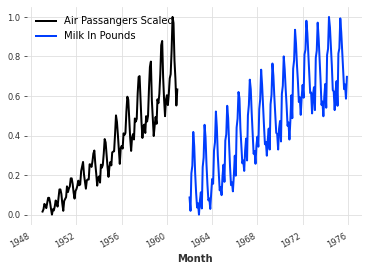

In [22]:
# View after scaling
# plottingair_ds.plot(label="Number Of Passengers")
air_series_scaled.plot(label = "Air Passangers Scaled")
milk_series_scaled.plot(label = "Milk In Pounds")
plt.legend()

### Train test split

In [23]:
air_series_train,  air_series_val = air_series_scaled[:-36], air_series_scaled[-36:] 
milk_series_train, milk_series_val = milk_series_scaled[:-36], milk_series_scaled[-36:]
print(f"The type of air passengers is {type(air_series_train)} and milk is {type(milk_series_train)} ")

The type of air passengers is <class 'darts.timeseries.TimeSeries'> and milk is <class 'darts.timeseries.TimeSeries'> 


### Creating a model - NBEATS

In [40]:
# importing model
from darts.models import NBEATSModel, ExponentialSmoothing
perf_dict = dict()
print('model_loaded')
# creating a model object
nb_model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
# fitting the model
# Air
nb_model.fit(air_series_train)
# Predict
pred_air_nb = nb_model.predict(n = 36, series = air_series_train)
perf_dict['air_nb'] = {
    'mape':mape(air_series_scaled , pred_air_nb)
    }
# Milk
nb_model.fit(milk_series_train)
# Predict
pred_milk_nb = nb_model.predict(n = 36, series = milk_series_train)
perf_dict['milk_nb'] = {
    'mape':mape(milk_series_scaled , pred_milk_nb)
    }
# View perf dict
pd.DataFrame(perf_dict).T.sort_values('mape')

[2022-03-16 10:18:24,064] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 73 samples.
[2022-03-16 10:18:24,064] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 73 samples.
[2022-03-16 10:18:24,126] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-16 10:18:24,126] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | criterion | MSELoss    | 0     
1 | stacks    | ModuleList | 6.2 M 
-----------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


model_loaded
Epoch 99: 100%|██████████| 3/3 [00:00<00:00,  6.33it/s, loss=0.000462]
Predicting: 3it [00:00, ?it/s]

[2022-03-16 10:19:10,459] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 97 samples.
[2022-03-16 10:19:10,459] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 97 samples.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
[2022-03-16 10:19:10,466] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_name` at model creation. Then call `model = NBEATSModel.load_from_checkpoint(model_name, best=False)`. Finally, train the model with `model.fit(..., epochs=new_epochs)` where `new_epochs` is the sum of (epochs already trained + some additional epochs).
[2022-03-16 10:19:10,466] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a c


Epoch 99: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s, loss=0.00165]
Predicting: 4it [00:00, ?it/s]


,mape
air_nb,10.863630
milk_nb,16.935905


### Prediction and Evaluation

In [41]:
from darts.metrics import mape
#perf_dict = dict()
# Create model
exs_model = ExponentialSmoothing()
# Fit exp smooth - air
exs_model.fit(air_series_train)
pred_air_exs = exs_model.predict(n = 36)
perf_dict['air_exs'] = {
    'mape':mape(air_series_scaled , pred_air_exs)
    }
# Fit exp smooth - milk
exs_model.fit(milk_series_train)
pred_milk_exs = exs_model.predict(n = 36)
perf_dict['milk_exs'] = {
    'mape':mape(milk_series_scaled , pred_milk_exs)
    }
# View perf dict
pd.DataFrame(perf_dict).T.sort_values('mape')

,mape
air_exs,8.044497
milk_exs,10.380154
air_nb,10.863630
milk_nb,16.935905


### Visualise predictions

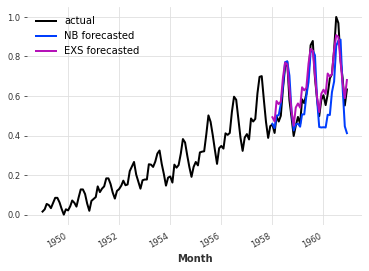

In [42]:
# plotting results
# Air
air_series_scaled .plot(label = "actual")
pred_air_nb.plot(label = "NB forecasted") # validation data set
pred_air_exs.plot(label = "EXS forecasted") # validation data set
plt.legend()

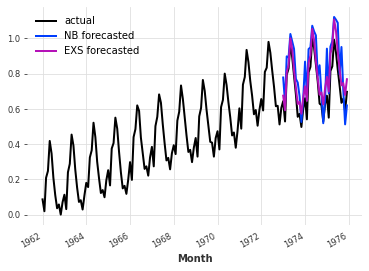

In [43]:
# plotting results
# Milk
milk_series_scaled .plot(label = "actual")
pred_milk_nb.plot(label = "NB forecasted") # validation data set
pred_milk_exs.plot(label = "EXS forecasted") # validation data set
plt.legend()